In [45]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [122]:
data = pd.read_csv("exp2022.csv", sep= ';') # 2008 até 2022
data.head(2)

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0


In [123]:
columns = data.columns
for i in range(2, len(columns), 2):  # Começando de 2 para pular "Id" e "País"
    year = columns[i]
    year_dot = columns[i + 1]
    data[year] = data[year] + data[year_dot]
    data.drop(year_dot, axis=1, inplace=True)

In [124]:
data = data[["Id", "País"] + [str(year) for year in range(2008, 2023)]]
data.head()


,Id,País,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0
1,2,África do Sul,0,0,0,0,0,0,0,0,0,0,0,121,25,0,0
2,3,"Alemanha, República Democrática",695712,618568,166381,180220,64531,327677,975001,55460,82121,103169,56176,29127,38866,9439,52997
3,4,Angola,96804,139021,223448,82890,11694,10873,35306,18997,42749,71850,1186,1410,0,0,8829
4,5,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
data.to_csv("data.csv")

In [125]:
# 1. Transformar o DataFrame
melted_data = pd.melt(data, id_vars='País', var_name='Ano', value_name='Quantidade_litros')

total_exported = melted_data.groupby('País')['Quantidade_litros'].sum().reset_index()

total_exported['País_origem'] = 'Brasil'

total_exported = total_exported[['País_origem', 'País', 'Quantidade_litros']]

total_exported.head()

,País_origem,País,Quantidade_litros
0,Brasil,Afeganistão,58
1,Brasil,"Alemanha, República Democrática",3455448
2,Brasil,Angola,745061
3,Brasil,Anguilla,5
4,Brasil,Antilhas Holandesas,239924


# Análise Exploratória de Dados (AED)

In [149]:
# Taxa de conversão: 1 BRL = 5 USD
# Vamos assumir um valor arbitrário de 1 BRL por litro de vinho. Se você tiver um valor específico, por favor, me informe.
valor_reais_por_litro = 1

total_exported['Valor_BRL'] = total_exported['Quantidade_litros'] * valor_reais_por_litro

taxa_conversao = 5  # 1 BRL = 5 USD
total_exported['Valor_USD'] = total_exported['Valor_BRL'] / taxa_conversao

total_exported.head()

total_exported.to_csv("tabela.csv")


In [150]:
# excluir países sem exportacao 

# Lista de países para excluir do dataset
paises_para_excluir = [
    "Tanzânia", "República Dominicana", "Iraque", "Ilhas Virgens", "Jamaica",
    "Costa do Marfim", "Senegal", "Porto Rico", "Anguila", "Líbano", "Tunísia", "Anguilla"
]

# Excluir os dados dos países especificados
data = data[~data["País"].isin(paises_para_excluir)]

Gráfico para o Grupo 1


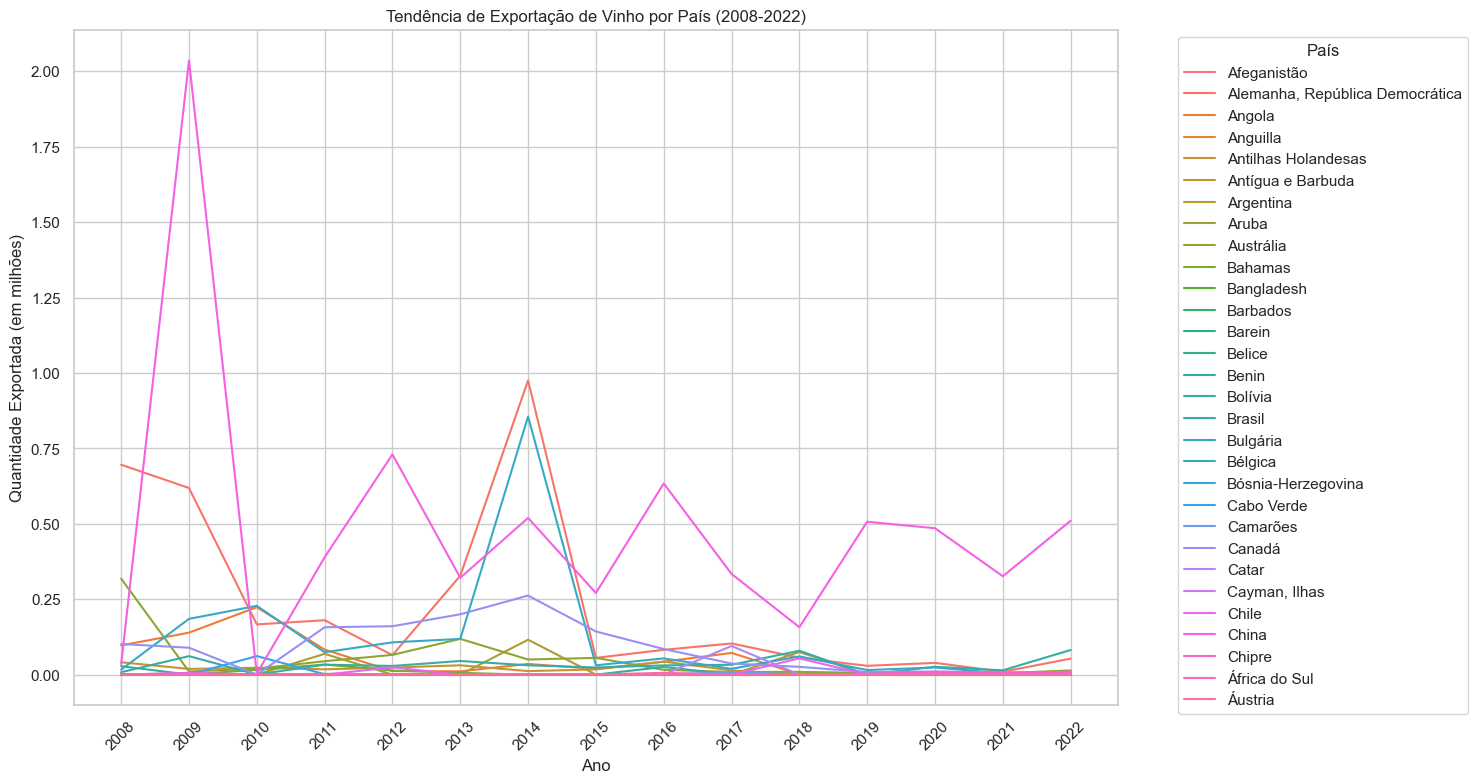

Gráfico para o Grupo 2


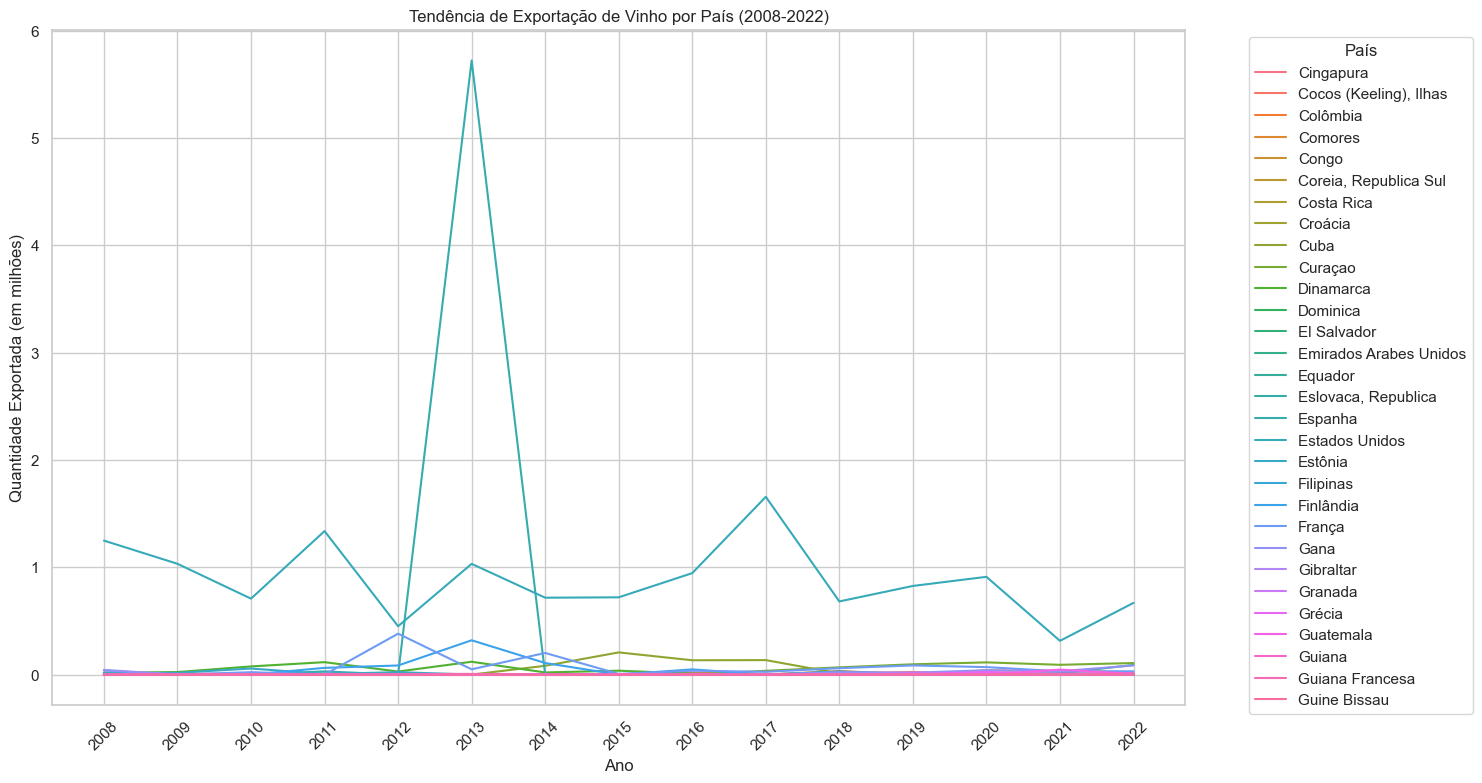

Gráfico para o Grupo 3


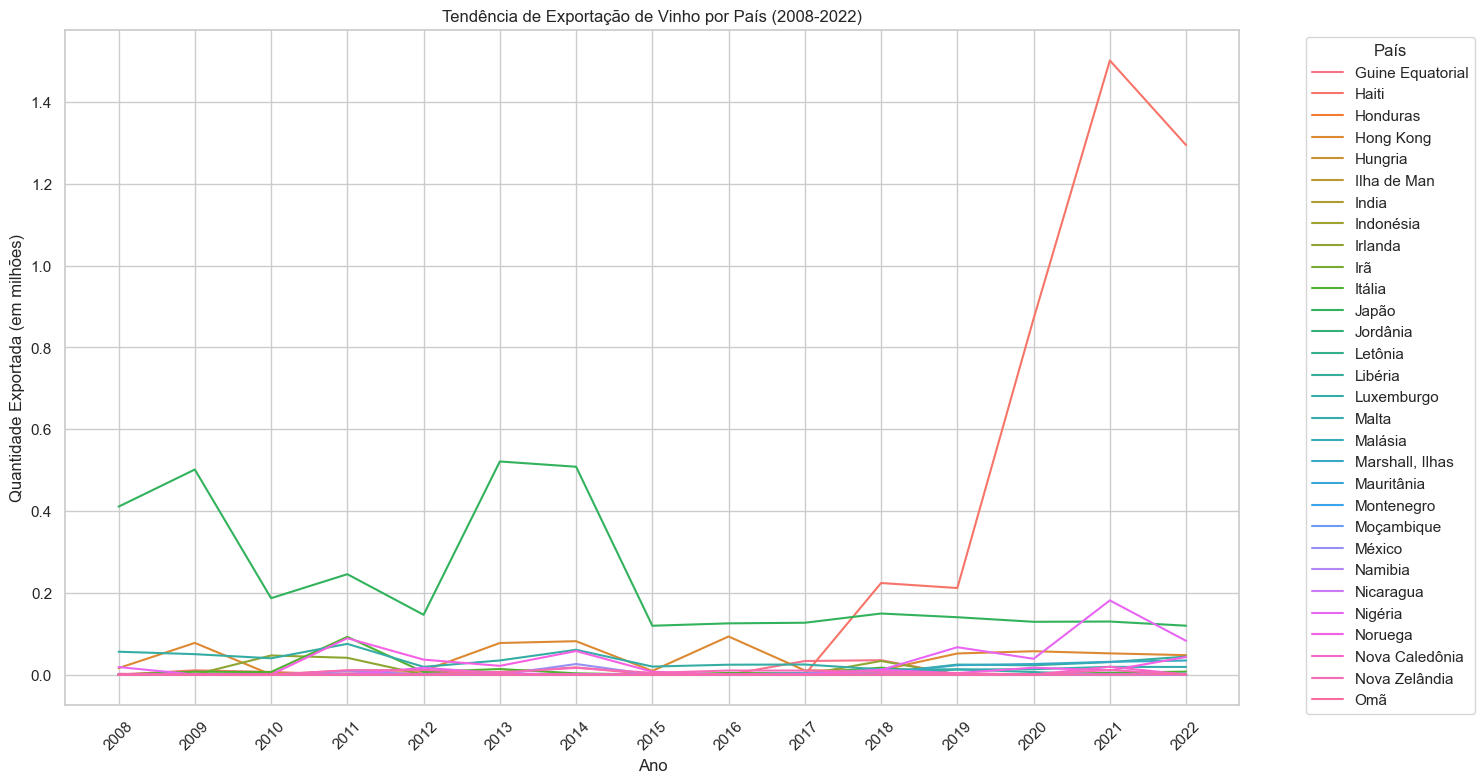

Gráfico para o Grupo 4


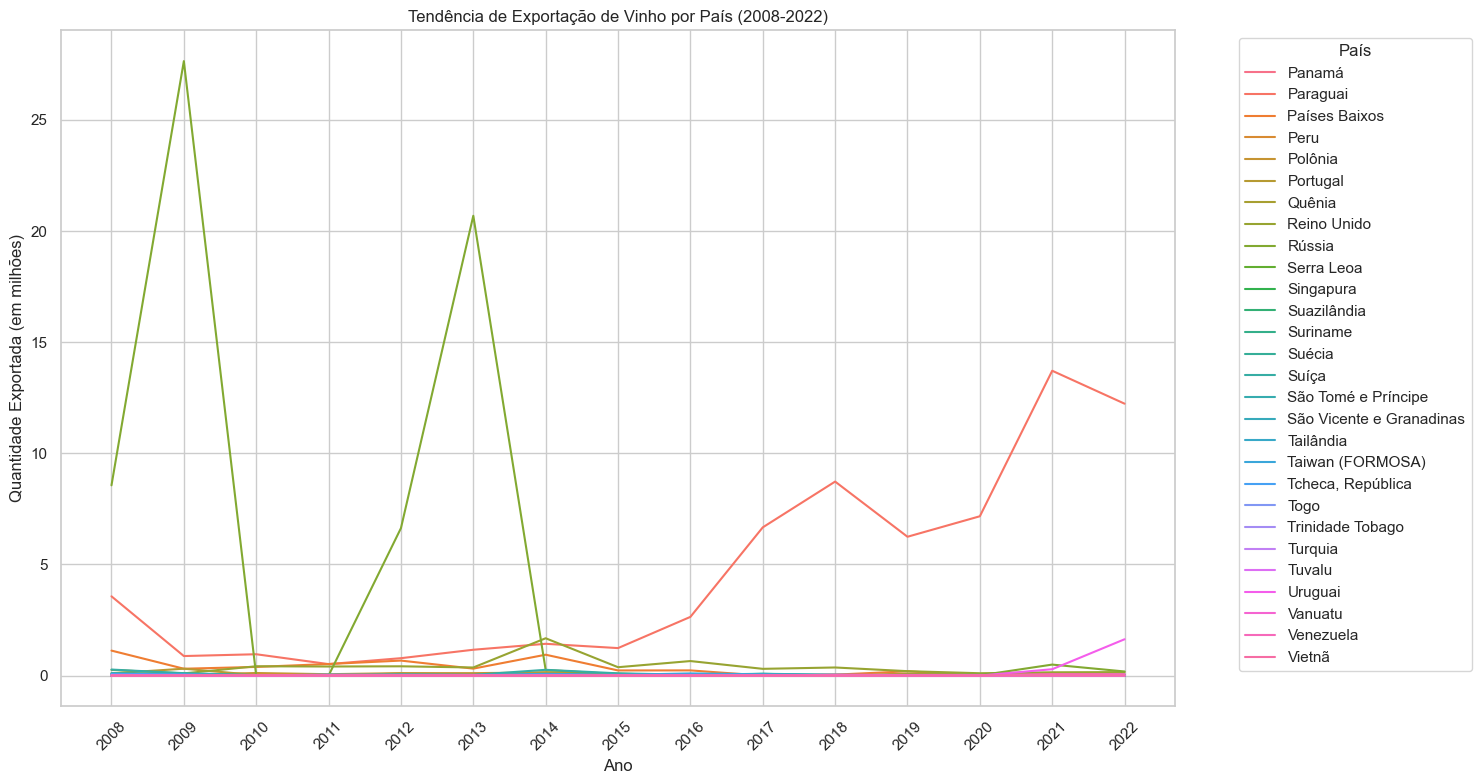

In [130]:
from math import ceil

def plot_wine_export_trends_grouped(data, group_size=30):
    unique_countries = data["País"].unique()
    
    # Calcular o número total de grupos
    total_groups = ceil(len(unique_countries) / group_size)
    
    # Dividir os países em grupos e plotar gráficos para cada grupo
    for i in range(total_groups):
        start_idx = i * group_size
        end_idx = start_idx + group_size
        countries_group = unique_countries[start_idx:end_idx]
        
        data_group = data[data["País"].isin(countries_group)]
        
        # Plotar o gráfico para o grupo atual
        print(f"Gráfico para o Grupo {i + 1}")
        plot_wine_export_trends(data_group)
        plt.show()

plot_wine_export_trends_grouped(data)


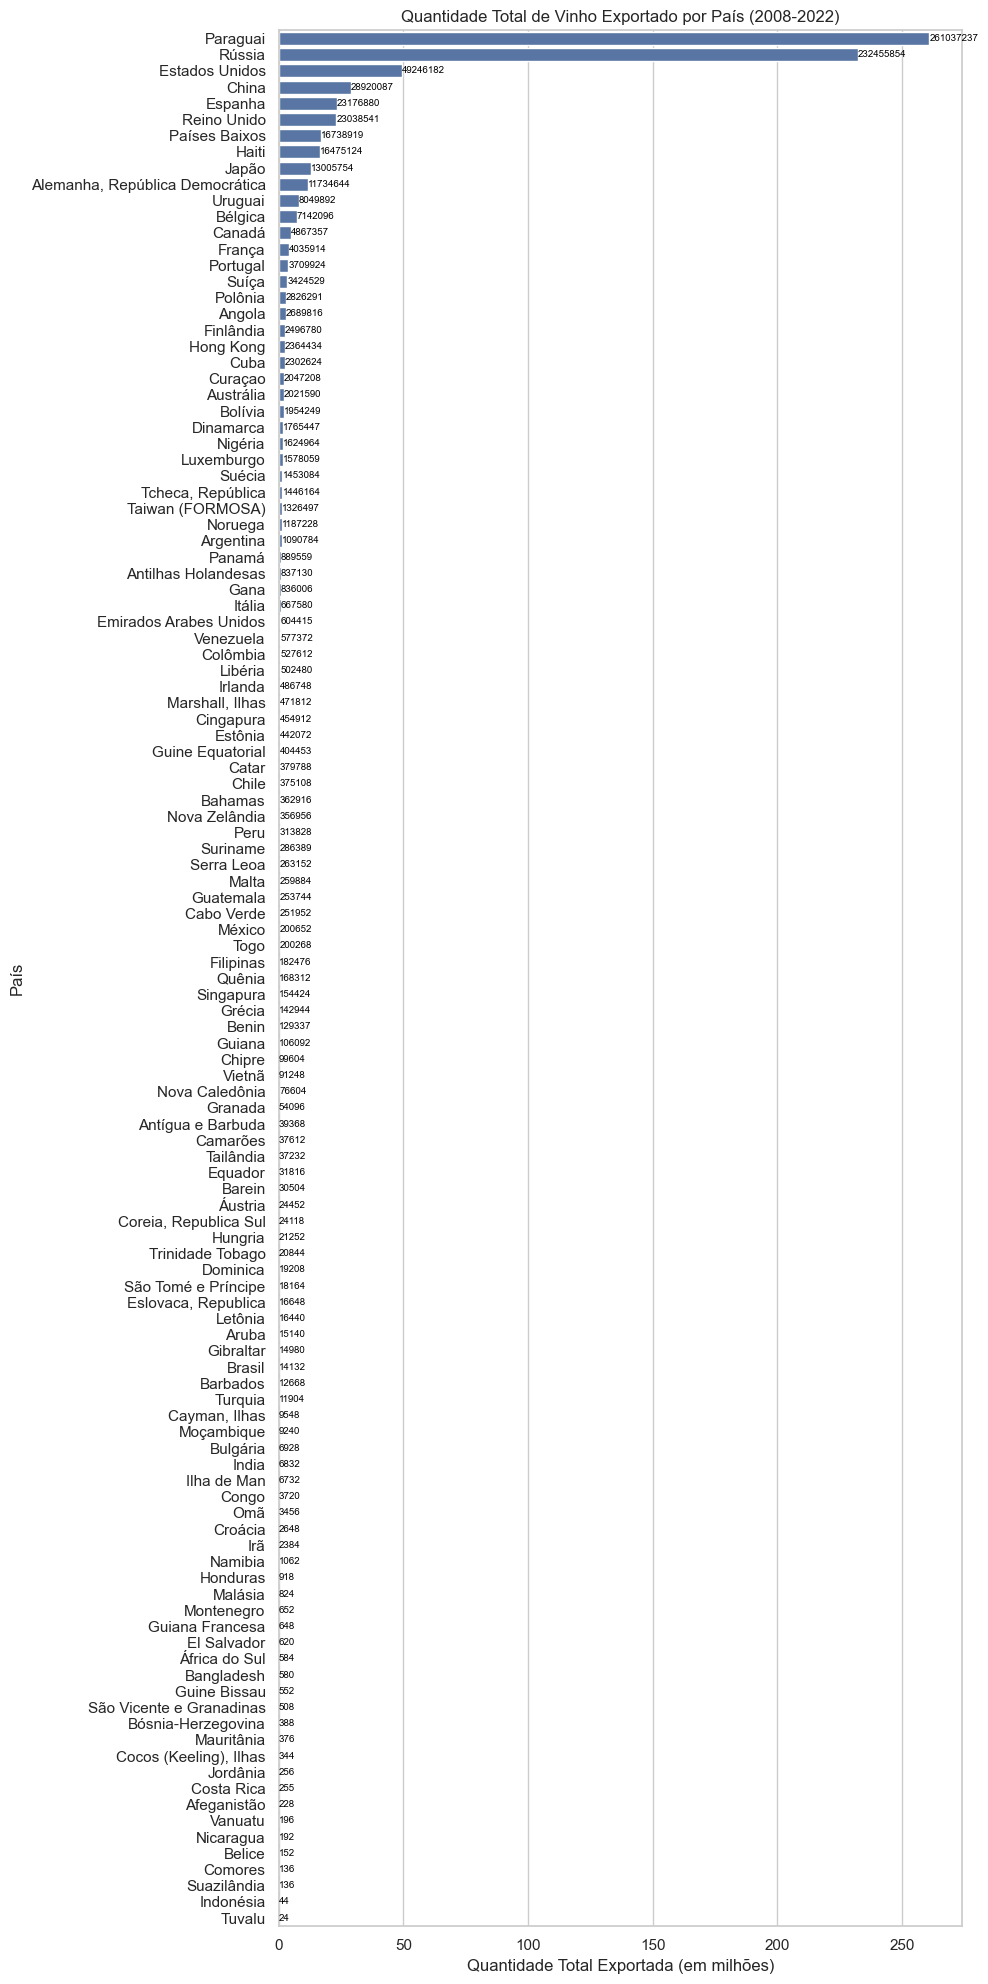

In [151]:

# Calcular a quantidade total de vinho exportado por país
total_exportado_por_pais = data.drop(columns=["Id"]).groupby("País").sum().sum(axis=1)
total_exportado_por_pais = total_exportado_por_pais.sort_values(ascending=False)

plt.figure(figsize=(10, 20))

barplot = sns.barplot(y=total_exportado_por_pais.index, x=total_exportado_por_pais.values / 1_000_000)

for index, value in enumerate(total_exportado_por_pais):
    plt.text(value / 1_000_000, index, f'{value:.0f}', color='black', ha="left", va="center", fontsize = 7)
plt.title("Quantidade Total de Vinho Exportado por País (2008-2022)")
plt.ylabel("País")
plt.xlabel("Quantidade Total Exportada (em milhões)")

plt.tight_layout()

plt.show()



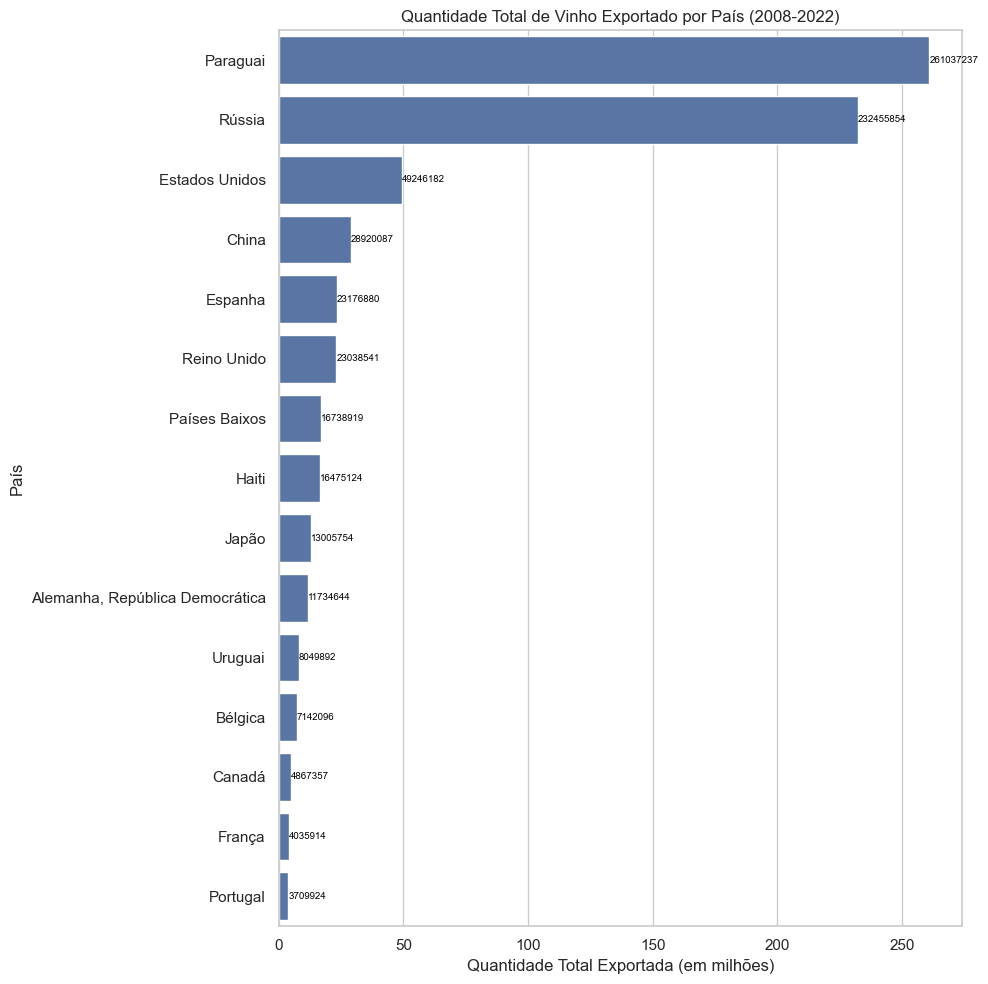

In [152]:
total_exportado_por_pais = data.drop(columns=["Id"]).groupby("País").sum().sum(axis=1)

total_exportado_por_pais = total_exportado_por_pais.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 10))

barplot = sns.barplot(y=total_exportado_por_pais.index, x=total_exportado_por_pais.values / 1_000_000)

for index, value in enumerate(total_exportado_por_pais):
    plt.text(value / 1_000_000, index, f'{value:.0f}', color='black', ha="left", va="center", fontsize = 7)

plt.title("Quantidade Total de Vinho Exportado por País (2008-2022)")
plt.ylabel("País")
plt.xlabel("Quantidade Total Exportada (em milhões)")

plt.tight_layout()

plt.show()


/var/folders/6x/yz3wcfr17r983l8g7wfyy1gr0000gn/T/ipykernel_54499/1675367924.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



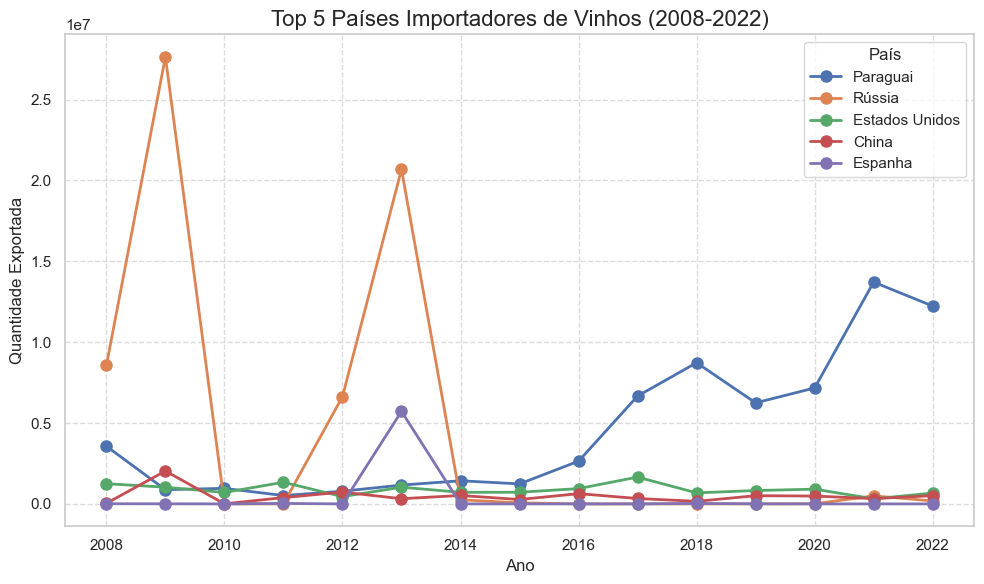

In [153]:
# 2. Top 5 Países Exportadores
total_exports_by_country = data.iloc[:, 3:].sum(axis=1)
data['Total Exportado'] = total_exports_by_country
top_exporters = data.sort_values(by='Total Exportado', ascending=False).head(5)

ax2 = top_exporters.drop(columns=['Id', 'Total Exportado']).set_index('País').T.plot(kind='line', marker='o', linewidth=2, markersize=8)
ax2.set_title('Top 5 Países Importadores de Vinhos (2008-2022)', fontsize=16)
ax2.set_xlabel('Ano', fontsize=12)
ax2.set_ylabel('Quantidade Exportada', fontsize=12)
ax2.legend(title='País')
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Observações:
Cada linha representa um dos cinco principais países exportadores de vinho, mostrando como suas exportações mudaram ao longo dos anos.
Alguns países mostram uma tendência de declínio nas exportações, enquanto outros têm padrões mais flutuantes.
Um país em particular (não podemos ver o nome no gráfico) teve um pico significativo em 2014, contribuindo para o pico nas exportações totais observadas no primeiro gráfico.

/var/folders/6x/yz3wcfr17r983l8g7wfyy1gr0000gn/T/ipykernel_54499/4086718552.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




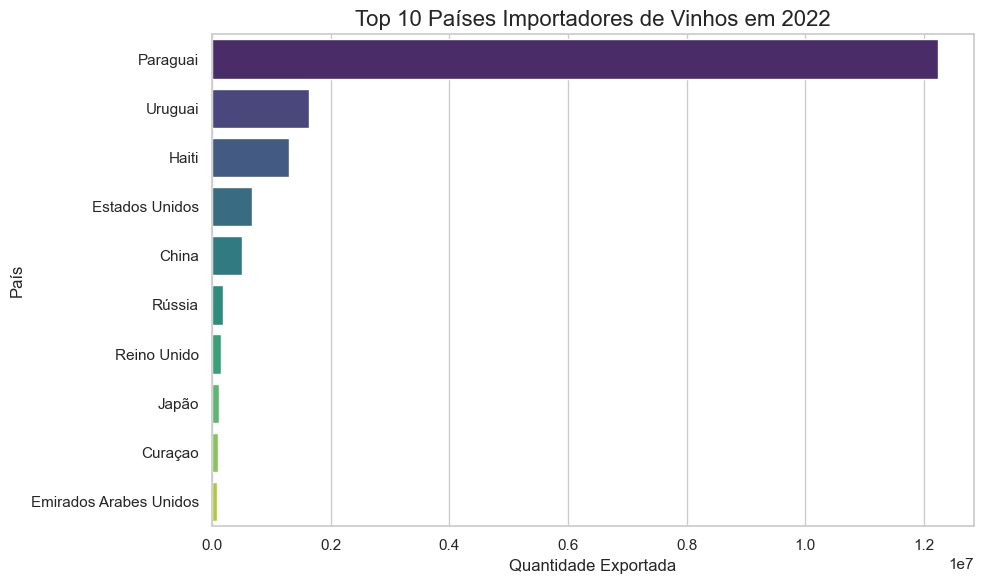

In [154]:
exports_2022 = data[['País', '2022']].sort_values(by='2022', ascending=False)
exports_2022 = exports_2022[exports_2022['2022'] > 0]  # Filtrar países com exportações positivas

ax3 = sns.barplot(x='2022', y='País', data=exports_2022.head(10), palette='viridis')
ax3.set_title('Top 10 Países Importadores de Vinhos em 2022', fontsize=16)
ax3.set_xlabel('Quantidade Exportada', fontsize=12)
ax3.set_ylabel('País', fontsize=12)

plt.tight_layout()
plt.show()


Vamos seguir para a próxima visualização, que mostrará a Distribuição das Exportações de Vinho em 2022 entre diferentes países. Isso nos ajudará a entender como as exportações estão distribuídas no ano mais recente do conjunto de dados
Observações:
O gráfico de barras ilustra a distribuição das exportações de vinho entre os dez principais países em 2022.
Existe uma variação significativa nas quantidades exportadas entre esses países.
O país no topo da lista tem uma quantidade exportada consideravelmente maior em comparação com os outros países.



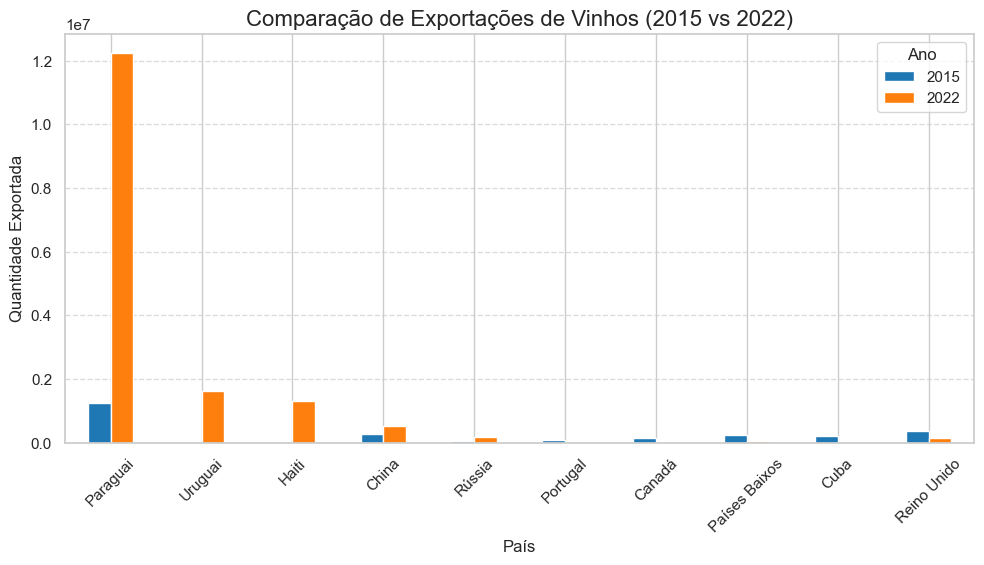

In [137]:
exports_before_after_2015 = data[['País', '2015', '2022']].set_index('País')
exports_before_after_2015['Diferença'] = exports_before_after_2015['2022'] - exports_before_after_2015['2015']
exports_before_after_2015 = exports_before_after_2015.sort_values(by='Diferença', ascending=False)

selected_countries = exports_before_after_2015.index[:5].tolist() + exports_before_after_2015.index[-5:].tolist()
exports_selected_countries = exports_before_after_2015.loc[selected_countries]

ax4 = exports_selected_countries[['2015', '2022']].plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
ax4.set_title('Comparação de Exportações de Vinhos (2015 vs 2022)', fontsize=16)
ax4.set_xlabel('País', fontsize=12)
ax4.set_ylabel('Quantidade Exportada', fontsize=12)
ax4.legend(title='Ano')
ax4.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


A próxima visualização que podemos criar é uma Comparação de Exportações Antes e Depois de 2015 para alguns países selecionados. Isso nos ajudará a entender como as exportações de vinho mudaram ao longo do tempo para esses países específicos.
Observações:
Os países no topo do gráfico aumentaram suas exportações de vinho entre 2015 e 2022.
Os países na parte inferior do gráfico viram uma redução nas exportações durante o mesmo período.
Alguns países tiveram mudanças significativas, enquanto outros tiveram variações mais moderadas.

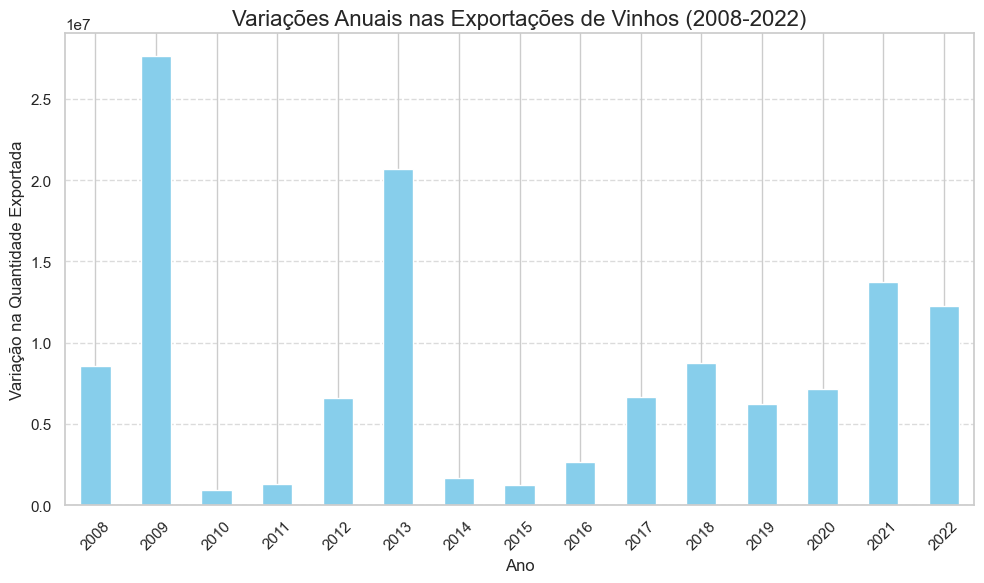

In [139]:
yearly_exports = data.drop(columns=['Id', 'País', 'Total Exportado'])
yearly_variations = yearly_exports.apply(lambda x: x.max() - x.min(), axis=0)

ax5 = yearly_variations.plot(kind='bar', color='skyblue')
ax5.set_title('Variações Anuais nas Exportações de Vinhos (2008-2022)', fontsize=16)
ax5.set_xlabel('Ano', fontsize=12)
ax5.set_ylabel('Variação na Quantidade Exportada', fontsize=12)
ax5.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


Para a última visualização sugerida, vamos criar um gráfico para mostrar as Variações Anuais nas Exportações de vinho. Isso nos dará uma ideia da estabilidade ou volatilidade nas exportações de vinho ao longo dos anos.
Observações:
Este gráfico de barras mostra a diferença entre a quantidade máxima e mínima de vinho exportada por todos os países em cada ano.
Anos com barras mais altas indicam maior variação nas quantidades exportadas entre diferentes países.
Observa-se uma variação significativa em vários anos, com picos notáveis em 2014 e 2022.


In [81]:
def total_exportacao_pais(data, pais):

    if pais not in data["País"].values:
        return f"O país {pais} não foi encontrado no dataset."
    
    data_pais = data[data["País"] == pais]
    
    total_exportacao = data_pais.iloc[:, 2:].sum().sum()
    
    return f"O valor total de exportação de vinhos para o {pais} ao longo dos anos é de {total_exportacao} unidades."

print(total_exportacao_pais(data, "Tanzânia"))


O valor total de exportação de vinhos para o Tanzânia ao longo dos anos é de 0 unidades.


# Taxa de crescimento anual 

In [100]:
data = data.drop(columns=['Id']).set_index('País')

years = data.columns.astype(int)
num_years = years[-1] - years[0]

df_growth = (data.loc[:, str(years[-1])] / (data.loc[:, str(years[0])] + 1e-10))**(1/num_years) - 1

df_growth_sorted = df_growth.sort_values(ascending=False)
df_growth_sorted.head(10)  
#

País
Uruguai            13.391253
Curaçao            10.849704
Venezuela          10.303253
Libéria            10.115594
Noruega            10.098575
Marshall, Ilhas     9.922997
Serra Leoa          9.622263
Colômbia            9.589076
Singapura           9.498358
Malta               9.457803
dtype: float64

In [112]:
total_exportado_por_pais = data.sum(axis=1)

total_exportado_por_pais_sorted = total_exportado_por_pais.sort_values(ascending=False)

top_exportadores = total_exportado_por_pais_sorted.head()
top_exportadores


# Passo 2: Calcular a taxa de crescimento anual para todos os países

df_growth = (data.loc[:, str(years[-1])] / (data.loc[:, str(years[0])] + 1e-10))**(1/num_years) - 1

df_growth_sorted = df_growth.sort_values(ascending=False)

top_exportadores_growth = df_growth.loc[top_exportadores.index]

top_exportadores_growth.sort_values(ascending=False)


País
China             0.211861
Paraguai          0.092042
Reino Unido      -0.034103
Estados Unidos   -0.043662
Rússia           -0.239688
dtype: float64

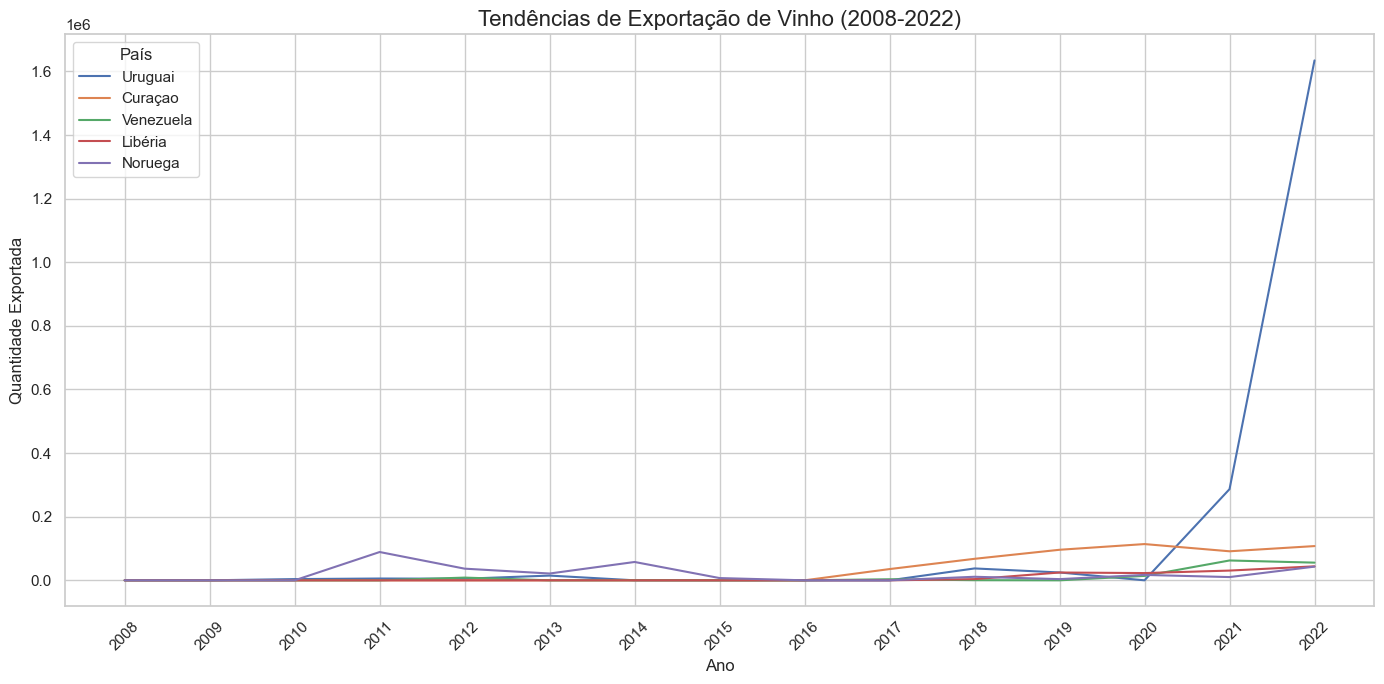

In [101]:

sns.set(style="whitegrid")

top_countries = df_growth_sorted.head(5).index
df_top_countries = data.loc[top_countries]

df_top_countries_transposed = df_top_countries.T

plt.figure(figsize=(14, 7))
for country in top_countries:
    plt.plot(df_top_countries_transposed.index, df_top_countries_transposed[country], label=country)

plt.title('Tendências de Exportação de Vinho (2008-2022)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade Exportada', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='País')
plt.tight_layout()

plt.show()


In [110]:
uruguay_stats = df_top_countries.loc['Uruguai'].describe()
uruguay_stats



count    1.500000e+01
mean     1.341649e+05
std      4.213904e+05
min      0.000000e+00
25%      0.000000e+00
50%      3.843000e+03
75%      1.977300e+04
max      1.634484e+06
Name: Uruguai, dtype: float64